# 教師あり学習の例

ここからは、実際に教師あり学習の例を見ていきます。

## 教師あり学習・回帰

ここでは、説明変数が1つの単回帰を実践します。

- (一社)日本アイスクリーム協会のサイトにある月別年間売上を使う https://www.icecream.or.jp/
- 気象庁のサイトから気温の情報を使う http://www.data.jma.go.jp

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

### アイスクリームの売上データ

- データを取得
- データの加工

In [3]:
icecream_data_tables = pd.read_html("https://www.icecream.or.jp/iceworld/data/expenditures.html")
len(icecream_data_tables)

5

In [4]:
icecream = icecream_data_tables[1]
icecream

,0,1,2,3,4,5
0,NaN,2017年,2018年,2019年,2020年,2021年
1,1 月,489,507,494,510,510
2,2 月,382,416,423,482,458
3,3 月,472,607,542,610,602
4,4 月,624,746,667,689,708
5,5 月,915,894,1000,1040,915
6,6 月,914,1021,991,1123,1089
7,7 月,1394,1506,1236,1155,1485
8,8 月,1370,1443,1513,1658,1427
9,9 月,826,861,996,1025,973


In [5]:
icecream_2020 = icecream.iloc[1:13, 4]
icecream_2020

1      510
2      482
3      610
4      689
5     1040
6     1123
7     1155
8     1658
9     1025
10     649
11     573
12     599
Name: 4, dtype: object

In [6]:
icecream_2020 = icecream_2020.astype(np.int32)
icecream_2020.dtype

dtype('int32')

In [7]:
list(icecream_2020.index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [8]:
icecream_2020.index = [f"{i}月" for i in icecream_2020.index]

In [9]:
icecream_2020

1月      510
2月      482
3月      610
4月      689
5月     1040
6月     1123
7月     1155
8月     1658
9月     1025
10月     649
11月     573
12月     599
Name: 4, dtype: int32

### 気温データ

- データの取得
- データの加工

In [10]:
temperature_data_tables = pd.read_html(
    "http://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662&year=2020&month=&day=&view=a2")
len(temperature_data_tables)

2

In [11]:
temperature_data_tables[0].head()

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
0,1875,NaN,NaN,NaN,NaN,NaN,25.5 ],30.1 ),29.4,25.6,19.9,16.1 ),10.2,21.9 ]
1,1876,6.6,8.2,13.6,17.5,21.7,22.8,28.6,31.6,26.8 ),20.4 ),15.8,11.0,18.7
2,1877,8.8,8.8,11.3 ),19.1 ),21.5 ),26.0,31.0,30.5,25.8,21.3,14.4,10.2,19.1
3,1878,7.2,7.1,12.9,16.2,22.7,24.1,29.8,28.5,26.3,20.2,14.1,10.9,18.3
4,1879,9.0,10.9,13.0,17.1,21.9,25.2,30.4,31.1,25.4,19.4,15.7,14.0,19.4


In [12]:
temperature = temperature_data_tables[0]

In [13]:
temperature.tail(6)

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
142,2017,10.8,12.1,13.4,19.9,25.1,26.4,31.8,30.4,26.8,20.1,16.6,11.1,20.4
143,2018,9.4,10.1,16.9,22.1,24.6,26.6,32.7,32.5,26.6,23.0,17.7,12.1,21.2
144,2019,10.3,11.6,15.4,19.0,25.3,25.8,27.5,32.8,29.4,23.3,17.7,12.6,20.9
145,2020,11.1,13.3,16.0,18.2,24.0,27.5,27.7,34.1,28.1,21.4,18.6,12.3,21.0
146,2021,10.3,14.0,17.9,20.6,24.1,27.3,30.3,31.6,26.2,22.7,18.6,12.5,21.3
147,2022,9.4,10.5,16.6,20.2,23.5,24.5 ],NaN,NaN,NaN,NaN,NaN,NaN,16.0 ]


In [14]:
temperature.loc[temperature.iloc[:, 0] == 2020, :]

,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年の値
145,2020,11.1,13.3,16.0,18.2,24.0,27.5,27.7,34.1,28.1,21.4,18.6,12.3,21.0


In [15]:
temperature_2020 = temperature.loc[temperature.iloc[:, 0] == 2020, :].iloc[0, 1:13].astype(np.float16)
temperature_2020

1月     11.101562
2月     13.296875
3月     16.000000
4月     18.203125
5月     24.000000
6月     27.500000
7月     27.703125
8月     34.093750
9月     28.093750
10月    21.406250
11月    18.593750
12月    12.296875
Name: 145, dtype: float16

### 2つのデータを連結

- データの再確認
- データの連結
- データの可視化

In [16]:
icecream_2020

1月      510
2月      482
3月      610
4月      689
5月     1040
6月     1123
7月     1155
8月     1658
9月     1025
10月     649
11月     573
12月     599
Name: 4, dtype: int32

In [17]:
temperature_2020

1月     11.101562
2月     13.296875
3月     16.000000
4月     18.203125
5月     24.000000
6月     27.500000
7月     27.703125
8月     34.093750
9月     28.093750
10月    21.406250
11月    18.593750
12月    12.296875
Name: 145, dtype: float16

データを組み合わせる

In [18]:
df_temp = pd.DataFrame([temperature_2020, icecream_2020])
df_temp

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
145,11.101562,13.296875,16.0,18.203125,24.0,27.5,27.703125,34.09375,28.09375,21.40625,18.59375,12.296875
4,510.000000,482.000000,610.0,689.000000,1040.0,1123.0,1155.000000,1658.00000,1025.00000,649.00000,573.00000,599.000000


In [19]:
df = df_temp.T
df.columns = ("気温", "売上")
df.index = [f"{i}" for i in df.index]
df

,気温,売上
1月,11.101562,510.0
2月,13.296875,482.0
3月,16.000000,610.0
4月,18.203125,689.0
5月,24.000000,1040.0
6月,27.500000,1123.0
7月,27.703125,1155.0
8月,34.093750,1658.0
9月,28.093750,1025.0
10月,21.406250,649.0


<AxesSubplot:xlabel='気温', ylabel='売上'>

/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  func(*args, **kwargs)
/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from current font.
  func(*args, **kwargs)
/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  func(*args, **kwargs)
/home/terapyon/dev/edu/hit-u/hit-u-ds-course/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27671 (\N{CJK U

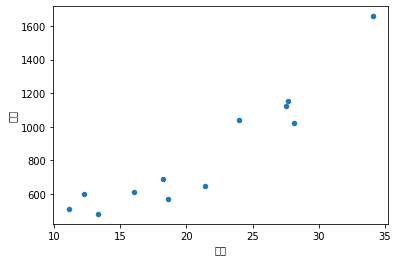

In [20]:
df.plot(kind='scatter', x="気温", y="売上")

In [21]:
df.corr()

,気温,売上
気温,1.000000,0.933384
売上,0.933384,1.000000


### 単回帰機械学習をスタート

- データの準備
- 線形回帰
- 学習

In [22]:
X = df.loc[:, ['気温']]
y = df.loc[:, '売上']

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X, y)

LinearRegression()

### テスト工程

- 学習済みモデルをテスト
- 結果の可視化

In [26]:
X_test = pd.DataFrame([10.0, 20.0], columns=["気温"])

In [27]:
model.predict(X_test)

array([341.2097852 , 796.15915621])

In [28]:
a = model.coef_[0]
print(a)
b = model.intercept_
print(b)
print(f"Line: y = {a:.3f}x {b:+.3f}")

45.49493710081502
-113.73958580509088
Line: y = 45.495x -113.740


In [29]:
x = X.iloc[:, 0]
# linaer データ
xs = np.linspace(min(x), max(x), 50)
ys = a * xs + b

In [30]:
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')

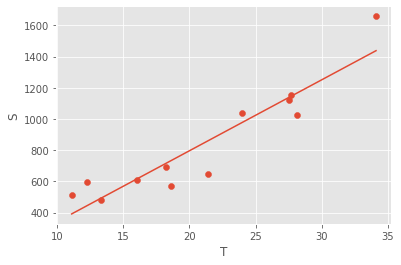

In [31]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.scatter(x, y)
ax.set_xlabel("T")
ax.set_ylabel("S")
plt.show()

## 教師あり学習・分類

ここでは、サンプルデータを使った分類を行う

- breast_cancer (ウィスコンシン州乳がんの診断ケース)
- 30個の検査結果の数値を説明変数とする
- 良性:0 (B)、悪性: 1 (M)で示される目的変数

### データの取得

- サンプルデータの読み込み
- データ加工

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [33]:
X = data.data
y = data.target

In [34]:
df_X = pd.DataFrame(X, columns=data.feature_names)
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df_y = pd.DataFrame(y, columns=['y'])
df_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [36]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
df.shape

(569, 31)

In [38]:
df.iloc[:, :10].corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [39]:
df.iloc[:, :10].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [40]:
from pandas.plotting import scatter_matrix

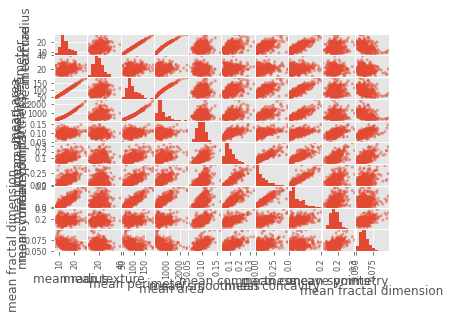

In [41]:
_ = scatter_matrix(df.iloc[:, :10])

### データを学習データとテストデータに分ける

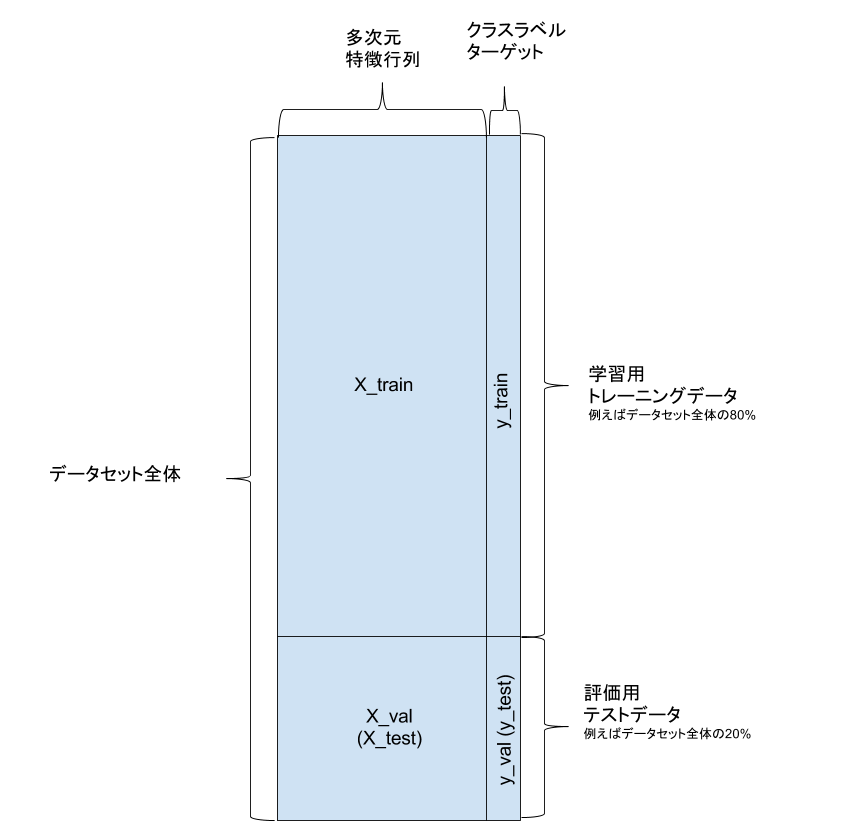

In [42]:
from IPython.display import Image
Image("img/spliting-data.png")

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :10], y, test_size=0.3)

### ロジスティック回帰で分類

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = LogisticRegression(max_iter=200)

In [47]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [48]:
y_train_pred = clf.predict(X_train)

### 分類結果の評価

- 正答率

In [49]:
from sklearn.metrics import accuracy_score

学習したデータの結果を評価

In [50]:
accuracy_score(y_train, y_train_pred)

0.9271356783919598

テストデータを使って予測して評価

In [51]:
y_test_pred = clf.predict(X_test)

In [52]:
accuracy_score(y_test, y_test_pred)

0.8888888888888888

混同行列で確認

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 44  13]
 [  6 108]]


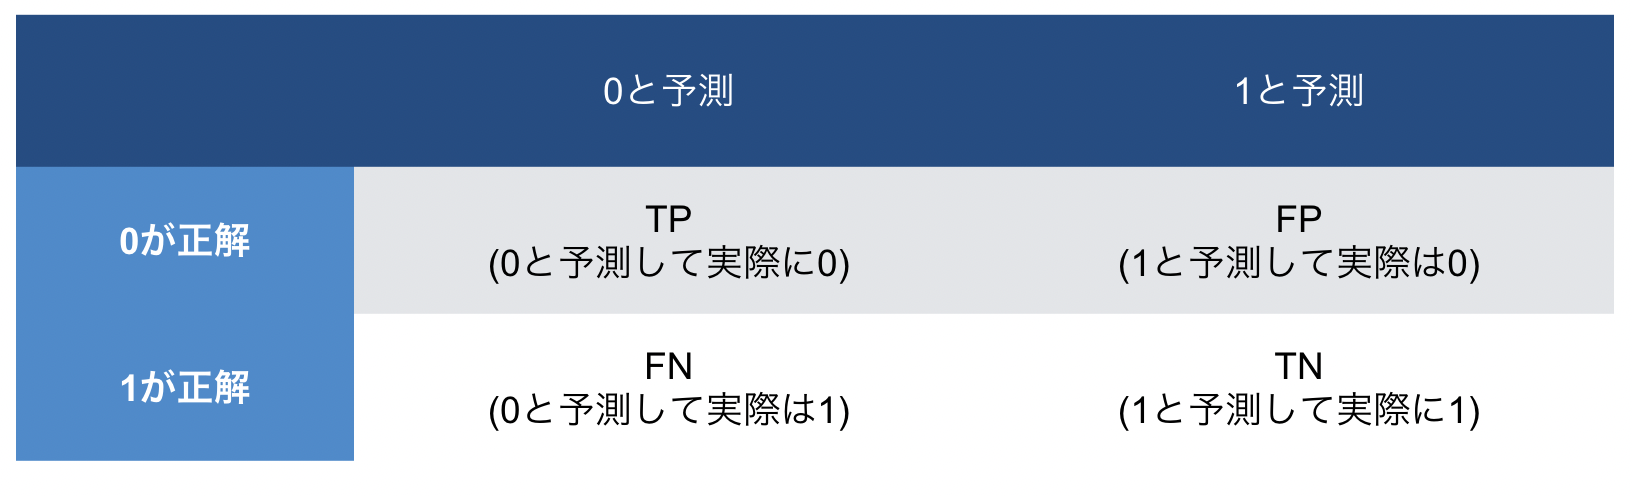

In [54]:
from IPython.display import Image
Image("img/confusion-matrix.png")

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        57
           1       0.89      0.95      0.92       114

    accuracy                           0.89       171
   macro avg       0.89      0.86      0.87       171
weighted avg       0.89      0.89      0.89       171



- 適合率 (precision)

ポジティプと予測した物の中で本当にポジティブだったものの割合を適合率といいます。
TP / (TP + FP)

- 再現率 (recall)

本当にポジティブの物を、どれだけ正確にポジティブと予測できた割合を再現率といいます。
TP / (TP + FN)

- F値 (f1-score)

適合率と再現率を組合せた指標をF値といいます。
2 / (1/適合率+1/再現率) -> 2 * 適合率 * 再現率 / (適合率 + 再現率)


### ROC曲線とAUC

データに対して予測確率の正確さを確認するために、ROC曲線と言われる指標で確認
確率の高い順に並べて、 `fpr` といわれる偽陽性率を横軸に、 `tpr` といわれる真陽性率を縦軸にしたグラフで表現

AUCは、1に近いほど正例に近く、0に近いほど負例に近くなり、0.5周辺ではランダムになっていると考えられる値


In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
probas = clf.predict_proba(X_test)

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

In [59]:
print('偽陽性率', fpr)
print('真陽性率', tpr)

偽陽性率 [0.         0.         0.         0.01754386 0.01754386 0.03508772
 0.03508772 0.05263158 0.05263158 0.07017544 0.07017544 0.0877193
 0.0877193  0.10526316 0.10526316 0.14035088 0.14035088 0.19298246
 0.19298246 0.24561404 0.24561404 0.28070175 0.28070175 0.33333333
 0.33333333 0.40350877 0.40350877 1.        ]
真陽性率 [0.         0.00877193 0.56140351 0.56140351 0.65789474 0.65789474
 0.72807018 0.72807018 0.78947368 0.78947368 0.81578947 0.81578947
 0.89473684 0.89473684 0.9122807  0.9122807  0.92105263 0.92105263
 0.94736842 0.94736842 0.95614035 0.95614035 0.97368421 0.97368421
 0.99122807 0.99122807 1.         1.        ]


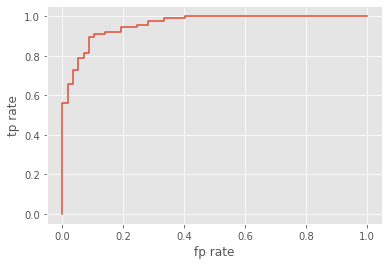

In [60]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('fp rate')
ax.set_ylabel('tp rate')
plt.show()

In [61]:
roc_auc_score(y_test, probas[:, 1])

0.9592182209910742

##　過学習 (Over fiting)

- すべてのデータで学習をしてしまうと、検証が難しくなる
- 学習済みモデルは未知のデータでの性能が重要
- 学習データを信じ切ってしまうと、未知のデータでの性能が悪くなる場合がある
- 学習データを信じ切ってしまい、学習しすぎることを過学習という

## 実データでの実装

実際のデータを使う場合には以下の課題があります。

- 対象のデータがあるか？
- データの加工は可能か？
- どのアルゴリズムを使うのか？
- 過学習していないか？

これらに対して以下のようなことを行います。

- データを集める
- アンケートなどでデータを作る
- ラベリングを手動で行う
- データ加工技術を学ぶ
- さまざまなアルゴリズムを試す
- 様々な指標で過学習について確認する
- ハイパーパラメータを調整する

## その他ツールを紹介

- 交差検証(cross validation) : scikit-learn `cross_val_score`
- グリッドサーチ(grid search): scikit-learn `GridSearchCV`
- 深層学習